Part 2A

In [1]:
import numpy as np

# Constants
mean_demand = 1867
std_demand = 431
variable_cost_per_unit = 80
selling_price_per_unit = 100
salvage_value_per_unit = 30
fixed_production_cost = 17000
num_simulations = 100000  # Number of replications

# Production quantities to test
production_quantities = [1400, 2150]

for Q in production_quantities:
    profits = []
    for _ in range(num_simulations):
        # Simulate demand for each month
        demand = np.random.normal(mean_demand, std_demand, 6)

        # Calculate revenue, cost, and profit for each month
        revenues = np.minimum(demand, Q) * selling_price_per_unit
        costs = Q * variable_cost_per_unit + fixed_production_cost
        salvage_values = (Q - np.minimum(demand, Q)) * salvage_value_per_unit
        profits.append(np.sum(revenues - costs + salvage_values))

    # Calculate expected monthly profit and standard deviation
    expected_profit = np.mean(profits)
    profit_std_dev = np.std(profits)

    print(f"For Q = {Q}:")
    print(f"Expected monthly profit: ${expected_profit:.2f}")
    print(f"Standard deviation of profit: ${profit_std_dev:.2f}")
    print()


For Q = 1400:
Expected monthly profit: $53134.25
Standard deviation of profit: $17763.23

For Q = 2150:
Expected monthly profit: $9303.57
Standard deviation of profit: $58183.48



Part 2B

In [2]:

# Production quantities to test
production_quantities = range(100, 5000, 50)  # Range of Q in multiples of 50

max_expected_profit = float('-inf')
optimal_Q = None

for Q in production_quantities:
    profits = []
    for _ in range(num_simulations):
        # Simulate demand for each month
        demand = np.random.normal(mean_demand, std_demand, 6)

        # Calculate revenue, cost, and profit for each month
        revenues = np.minimum(demand, Q) * selling_price_per_unit
        costs = Q * variable_cost_per_unit + fixed_production_cost
        salvage_values = (Q - np.minimum(demand, Q)) * salvage_value_per_unit
        profits.append(np.sum(revenues - costs + salvage_values))

    # Calculate expected monthly profit
    expected_profit = np.mean(profits)

    # Update optimal Q if higher expected profit is found
    if expected_profit > max_expected_profit:
        max_expected_profit = expected_profit
        optimal_Q = Q

print(f"Optimal production quantity (Q) for maximizing expected monthly profit: {optimal_Q}")
print(f"Expected monthly profit at optimal Q: ${max_expected_profit:.2f}")

Optimal production quantity (Q) for maximizing expected monthly profit: 1650
Expected monthly profit at optimal Q: $60462.59


Part 2C

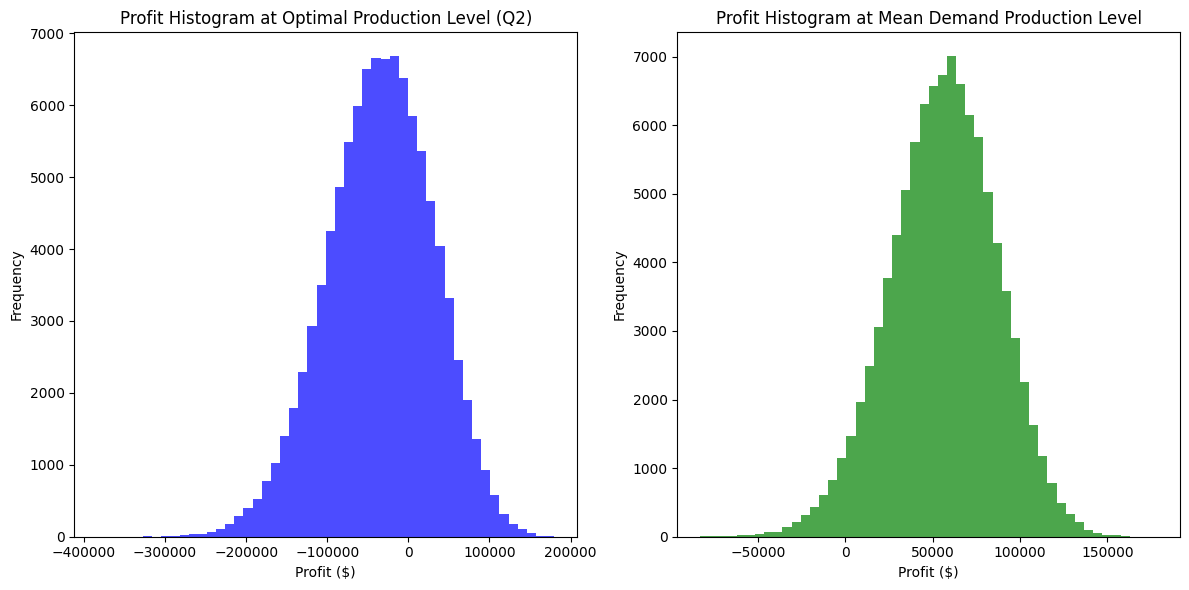

Probability of a monthly loss greater than $14,000 at optimal production level (Q2): 0.6121
Probability of a monthly loss greater than $14,000 at mean demand production level: 0.0147


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mean_demand = 1867
std_demand = 431
variable_cost_per_unit = 80
selling_price_per_unit = 100
salvage_value_per_unit = 30
fixed_production_cost = 17000
num_simulations = 100000  # Number of replications

# Optimal production quantity (Q2)
Q2 = 2350  # Assume the optimal production quantity obtained previously

# Simulate profits at Q2
profits_Q2 = []
for _ in range(num_simulations):
    # Simulate demand for each month
    demand = np.random.normal(mean_demand, std_demand, 6)

    # Calculate revenue, cost, and profit for each month at Q2
    revenues = np.minimum(demand, Q2) * selling_price_per_unit
    costs = Q2 * variable_cost_per_unit + fixed_production_cost
    salvage_values = (Q2 - np.minimum(demand, Q2)) * salvage_value_per_unit
    profit = np.sum(revenues - costs + salvage_values)
    profits_Q2.append(profit)

# Simulate profits at mean demand production level
profits_mean_demand = []
for _ in range(num_simulations):
    # Simulate demand for each month
    demand = np.random.normal(mean_demand, std_demand, 6)

    # Calculate revenue, cost, and profit for each month at mean demand production level
    Q_mean_demand = np.mean(demand)
    revenues = np.minimum(demand, Q_mean_demand) * selling_price_per_unit
    costs = Q_mean_demand * variable_cost_per_unit + fixed_production_cost
    salvage_values = (Q_mean_demand - np.minimum(demand, Q_mean_demand)) * salvage_value_per_unit
    profit = np.sum(revenues - costs + salvage_values)
    profits_mean_demand.append(profit)

# Create histograms of profit
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(profits_Q2, bins=50, color='blue', alpha=0.7)
plt.title('Profit Histogram at Optimal Production Level (Q2)')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(profits_mean_demand, bins=50, color='green', alpha=0.7)
plt.title('Profit Histogram at Mean Demand Production Level')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate probability of monthly loss greater than $14,000
prob_loss_Q2 = np.mean(np.array(profits_Q2) < -14000)
prob_loss_mean_demand = np.mean(np.array(profits_mean_demand) < -14000)

print(f"Probability of a monthly loss greater than $14,000 at optimal production level (Q2): {prob_loss_Q2:.4f}")
print(f"Probability of a monthly loss greater than $14,000 at mean demand production level: {prob_loss_mean_demand:.4f}")
